# Lab | Feature extraction

### 1. Open the categoricals variable we created before.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
# load the data set
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Standardizing column header names
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# converting effective_to_date column from object to datetime format

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

##### Dropping "customer" column because any ID variable is unique and it is not contributing anything to our target column

In [10]:
customer_df=customer_df.drop(["customer"], axis=1)

In [14]:
# Extracting categorical variables

categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

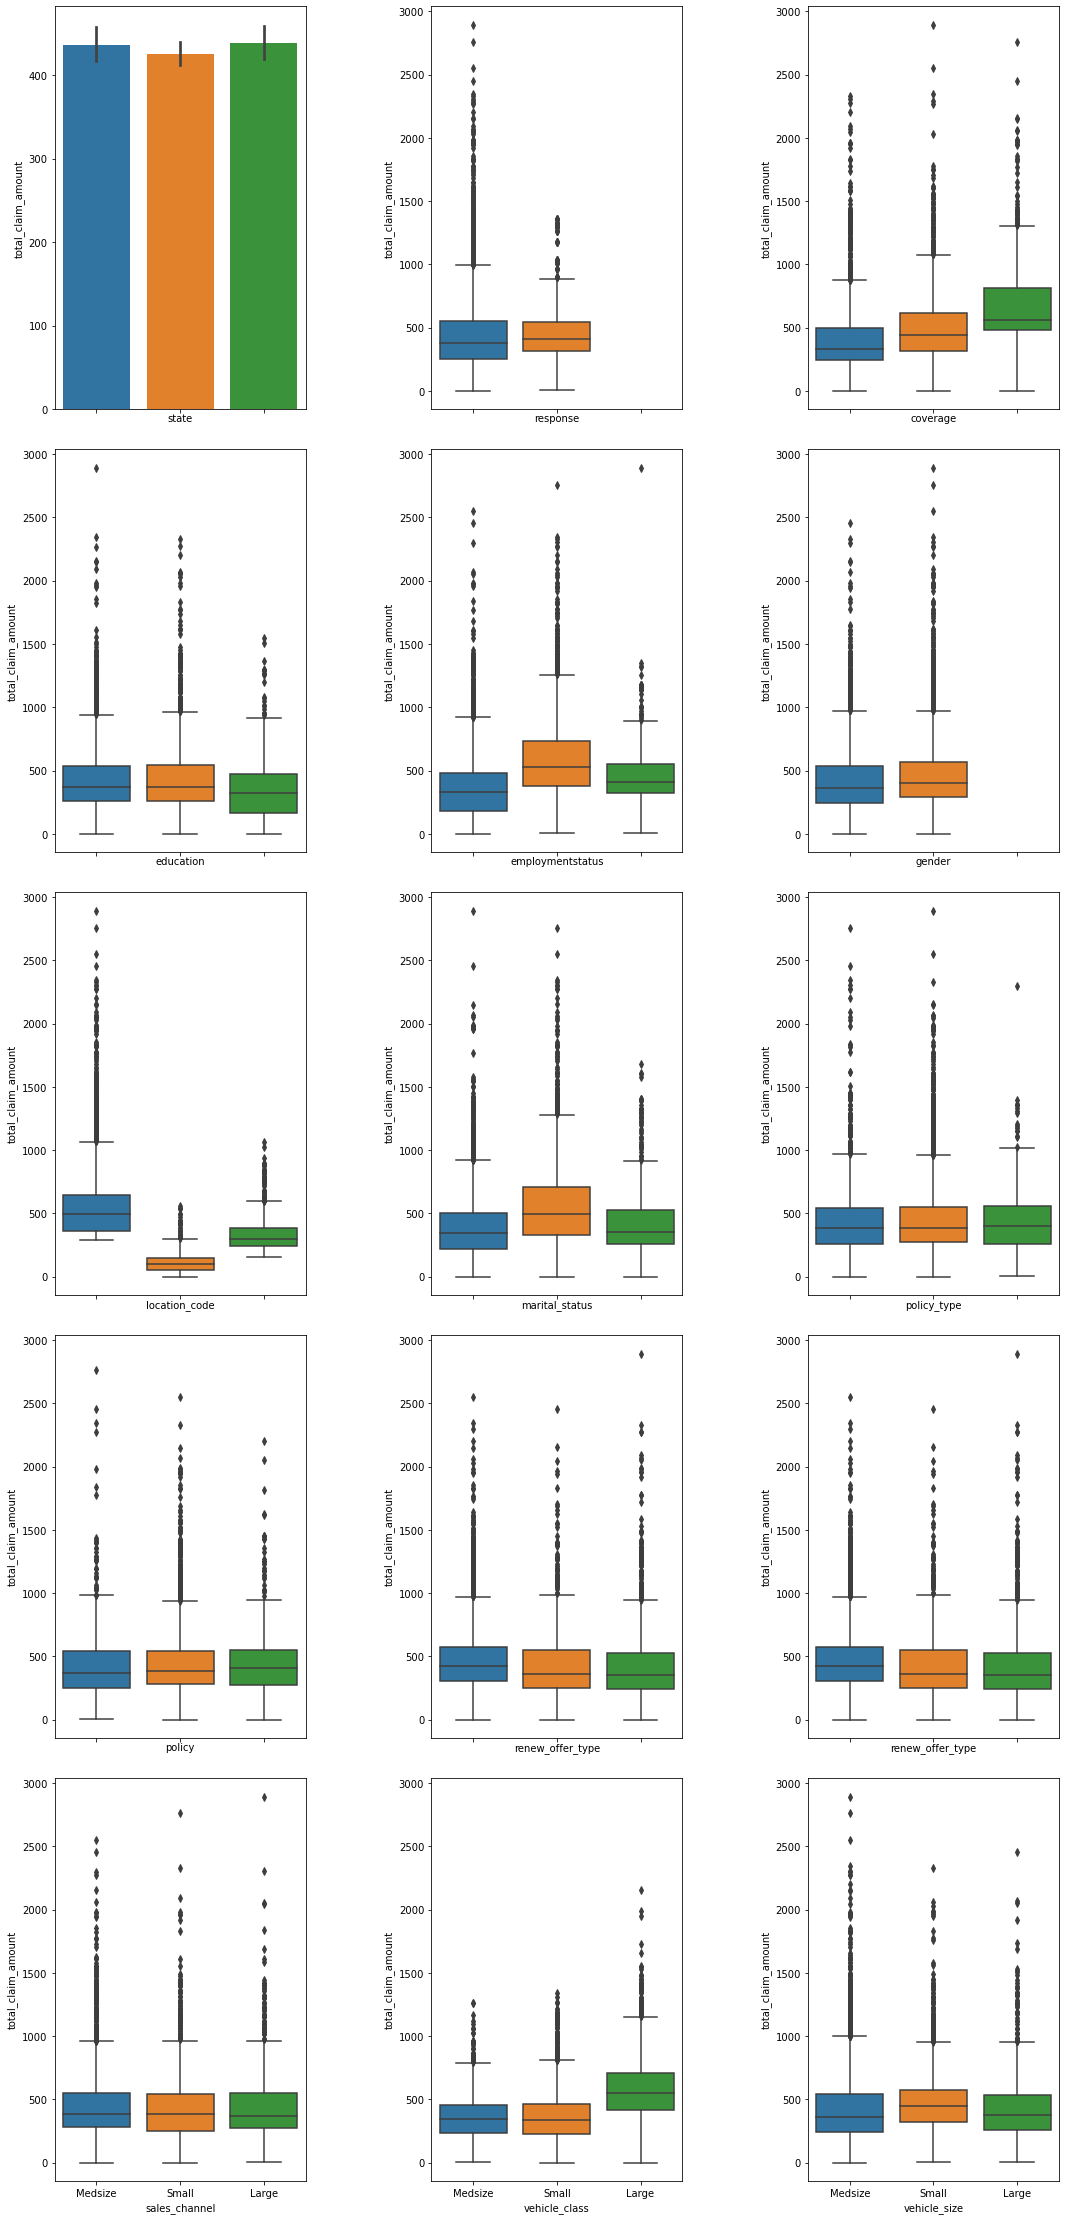

In [15]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) # 5 rows  x 3 columns

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

sns.barplot(ax=axes[0, 0], data=customer_df, y="total_claim_amount", x="state")
sns.boxplot(ax=axes[0, 1], data=customer_df, x="response", y="total_claim_amount")
sns.boxplot(ax=axes[0, 2], data=customer_df, x="coverage", y="total_claim_amount")
sns.boxplot(ax=axes[1, 0], data=customer_df, x="education", y="total_claim_amount")
sns.boxplot(ax=axes[1, 1], data=customer_df, x="employmentstatus", y="total_claim_amount")
sns.boxplot(ax=axes[1, 2], data=customer_df, x="gender", y="total_claim_amount")
sns.boxplot(ax=axes[2, 0], data=customer_df, x="location_code", y="total_claim_amount")
sns.boxplot(ax=axes[2, 1], data=customer_df, x="marital_status", y="total_claim_amount")
sns.boxplot(ax=axes[2, 2], data=customer_df, x="policy_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 0], data=customer_df, x="policy", y="total_claim_amount")
sns.boxplot(ax=axes[3, 1], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 2], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[4, 0], data=customer_df, x="sales_channel", y="total_claim_amount")
sns.boxplot(ax=axes[4, 1], data=customer_df, x="vehicle_class", y="total_claim_amount")
sns.boxplot(ax=axes[4, 2], data=customer_df, x="vehicle_size", y="total_claim_amount")

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

 - There is **no a strong relationship between our target column and the categorical features listed below**
  - vehicle_size
  - sales_channel
  - renew_offer_type
  - policy
  - policy_type
  - gender
  - response
  - state
  
 - **So we can drop the above columns**

### 4. Plot time variable. Can you extract something from it?

 - **'effective_to_date'** column is the only column having dtype as date-time i.e **time variable**

In [17]:
customer_df.effective_to_date.value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

 - 'effective_to_date' column has lot of values we can just extract the months from date and then we can plot a graph

In [18]:
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month

In [19]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


 - Now we can plot a graph using month column

<AxesSubplot:>

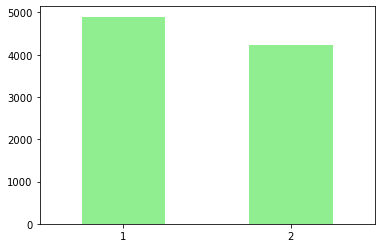

In [20]:
customer_df['month'].value_counts().plot.bar(rot=0, color='lightgreen')

 - We have insurance data for only **2 months** of effective_to_date column for **January and February**.